### **Predicting Heart Disease using Machine Learning**

#### ***Problem Definition***
In this case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement, Given clinical parameters about a patient, can we predict whether or not they have heart disease?

#### ***Data***
The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, this dataset is downloaded in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what will be used to predict the target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict the dependent variable.

Or in this case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

#### ***Features***
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

##### ***Heart Disease Data Dictionary***
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

***Note:*** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them
later without coming back here.

#### ***Importing essential libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart.csv', 'Heart_Failure_Prediction.ipynb', 'README.md']


#### ***Importing and understanding the dataset***

In [2]:
dataset = pd.read_csv("heart.csv")

Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Luckily, here we can see there is no missing values

Let's understand the column better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Let's analyse the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

Here we can see this is clearly a classification problem with the target variable having value '0' and '1'

Checking the correlation between columns

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

#### ***Exploratory Data Analysis (EDA)***

First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


<Axes: xlabel='target'>

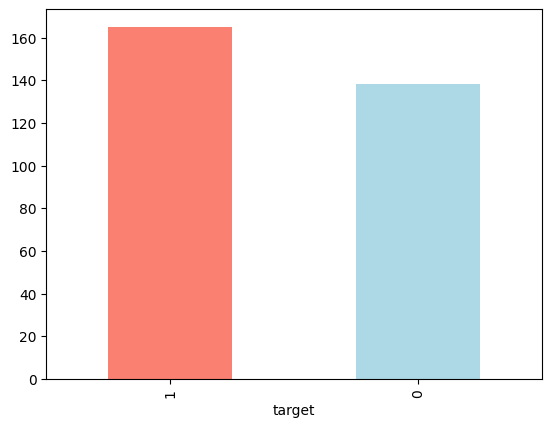

In [13]:
y = dataset["target"]

target_temp = dataset.target.value_counts()
print(target_temp)

target_temp.plot(kind="bar", color=["salmon", "lightblue"])

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


Now We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

Analysing the feature: 'Sex' 

In [15]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

As expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

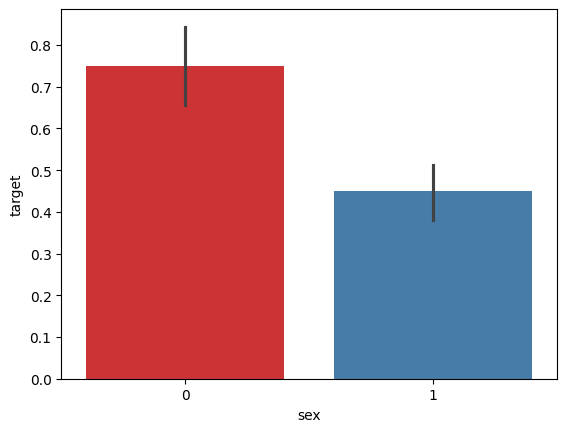

In [16]:
sns.barplot(x = dataset["sex"], y = dataset["target"], palette="Set1")

Females are more likely to have heart problems than males

Analysing the feature: 'Chest Pain Type' 

In [17]:
dataset['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

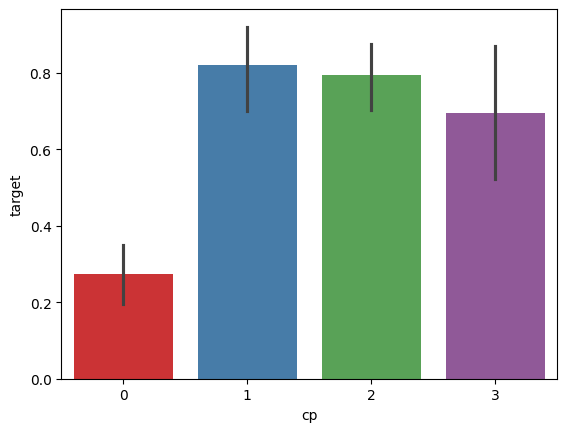

In [18]:
sns.barplot(x = dataset["cp"], y = dataset["target"], palette="Set1")

Chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

Analysing the feature: 'FBS'

In [19]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

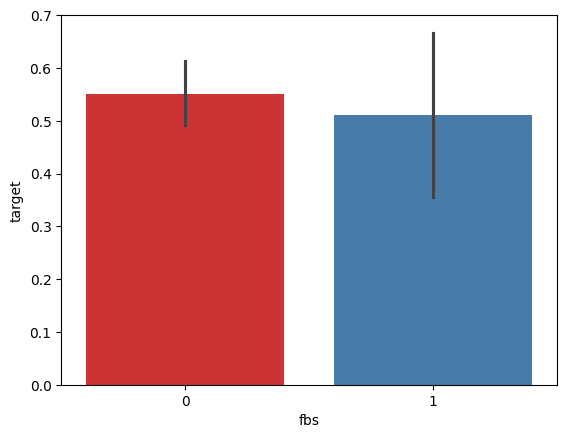

In [21]:
sns.barplot(x = dataset["fbs"], y = dataset["target"], palette="Set1")

Nothing extraordinary here

Analysing the feature: 'restecg' 

In [22]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

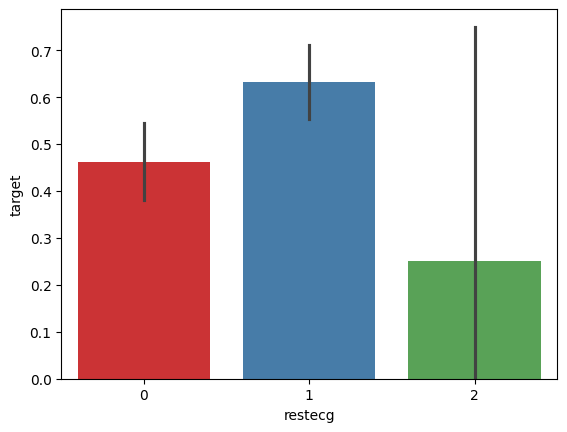

In [23]:
sns.barplot(x = dataset["restecg"], y = dataset["target"], palette="Set1")

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the feature: 'exang' 

In [24]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

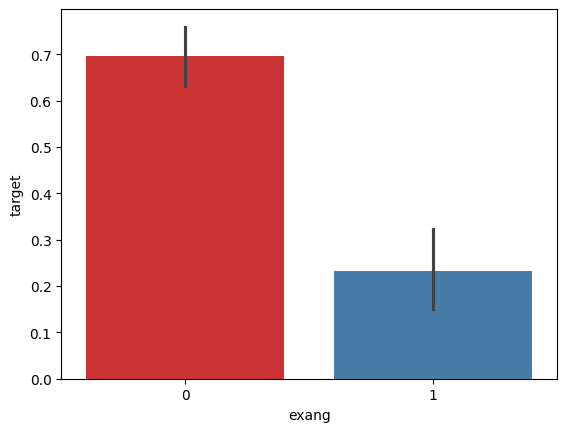

In [25]:
sns.barplot(x = dataset["exang"], y = dataset["target"], palette="Set1")

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

Analysing the feature: 'Slope' 

In [26]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

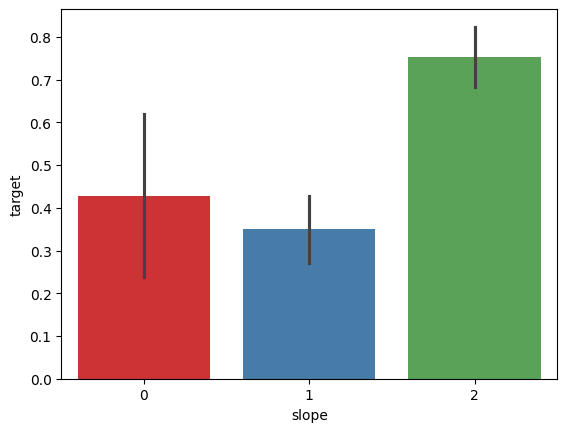

In [27]:
sns.barplot(x = dataset["slope"], y = dataset["target"], palette="Set1")

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

Analysing the feature: 'ca' 

In [28]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='target'>

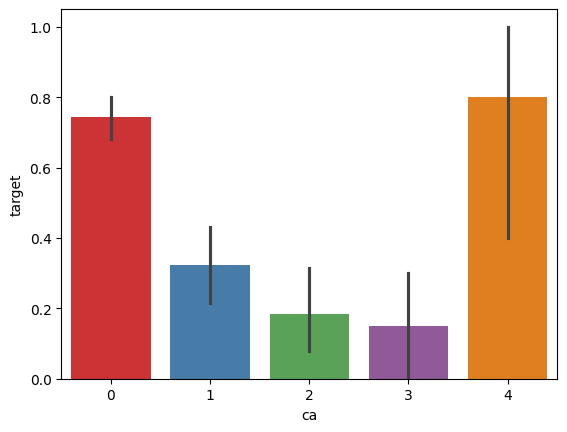

In [29]:
sns.barplot(x = dataset["ca"], y = dataset["target"], palette="Set1")

ca=4 has astonishingly large number of heart patients

Analysing the feature: 'thal' 

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

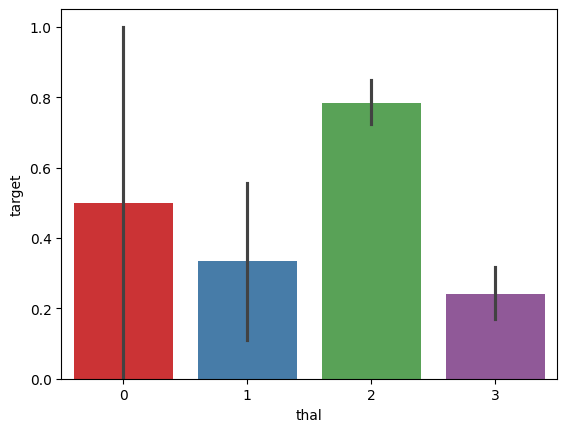

In [31]:
sns.barplot(x = dataset["thal"], y = dataset["target"], palette="Set1")

<Axes: xlabel='thal', ylabel='Density'>

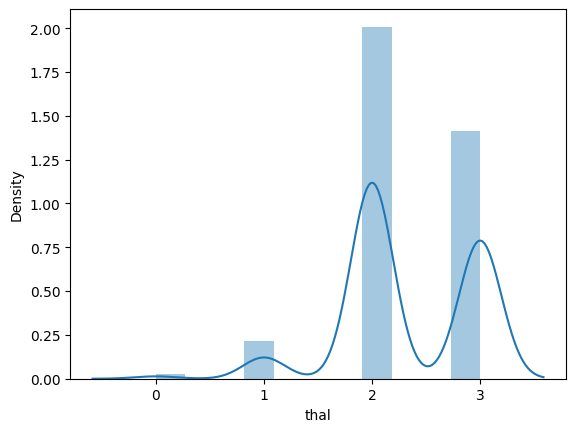

In [32]:
sns.distplot(dataset["thal"])

#### ***Correlation between independent variables***
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [33]:
# Find the correlation between our independent variables
corr_matrix = dataset.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


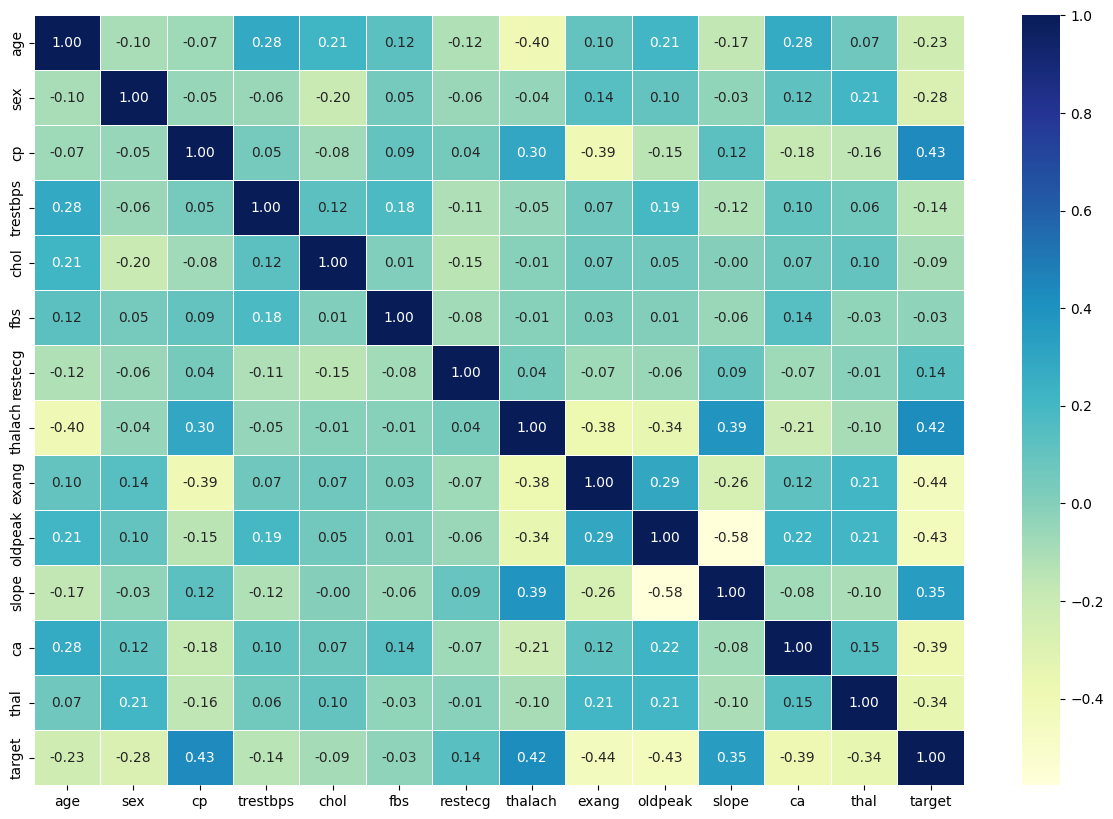

In [34]:
# Let's make it look a little prettier
corr_matrix = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

#### ***Splitting the dataset into training and testing set***

In [35]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [36]:
X_train.shape

(242, 13)

In [37]:
X_test.shape

(61, 13)

In [38]:
Y_train.shape

(242,)

In [39]:
Y_test.shape

(61,)

#### ***Model Selection***

In [40]:
from sklearn.metrics import accuracy_score

#### ***Logistic Regression***

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [42]:
Y_pred_lr.shape

(61,)

In [43]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")

The accuracy score achieved using Logistic Regression is: 85.25 %


#### ***Naive Bayes***

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred_nb = nb.predict(X_test)

In [45]:
Y_pred_nb.shape

(61,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100, 2)

print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")

The accuracy score achieved using Naive Bayes is: 85.25 %


#### ***SVM***

In [47]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [48]:
Y_pred_svm.shape

(61,)

In [49]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100, 2)

print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

The accuracy score achieved using Linear SVM is: 81.97 %


#### ***K Nearest Neighbors***

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

In [51]:
Y_pred_knn.shape

(61,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100, 2)

print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

The accuracy score achieved using KNN is: 67.21 %


#### ***Decision Tree***

In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test)*100, 2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

In [54]:
print(Y_pred_dt.shape)

(61,)


In [55]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100, 2)

print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")

The accuracy score achieved using Decision Tree is: 81.97 %


#### ***Random Forest***

In [56]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [57]:
Y_pred_rf.shape

(61,)

In [58]:
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)

print("The accuracy score achieved using Decision Tree is: " + str(score_rf) + " %")

The accuracy score achieved using Decision Tree is: 90.16 %


#### ***XGBoost***

In [59]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [60]:
Y_pred_xgb.shape

(61,)

In [61]:
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test)*100, 2)

print("The accuracy score achieved using XGBoost is: " + str(score_xgb) + " %")

The accuracy score achieved using XGBoost is: 83.61 %


#### ***Neural Network***

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential([
    Dense(11, activation='relu', input_shape=(13,)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- ***Validation Split:*** It’s often helpful to use a validation split to monitor performance on a held-out subset of data.
- ***Early Stopping:*** Consider using early stopping to prevent overfitting by halting training when performance stops improving.

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, Y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5265 - loss: 30.4180 - val_accuracy: 0.4694 - val_loss: 24.0495
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5465 - loss: 21.4396 - val_accuracy: 0.4694 - val_loss: 15.8036
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5858 - loss: 13.0352 - val_accuracy: 0.5306 - val_loss: 8.2148
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6142 - loss: 7.2058 - val_accuracy: 0.6531 - val_loss: 3.2327
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6305 - loss: 4.4558 - val_accuracy: 0.7551 - val_loss: 2.7858
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6329 - loss: 4.6474 - val_accuracy: 0.7347 - val_loss: 3.1947
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6689 - loss: 4.4033 - val_accuracy: 0.7143 - val_loss: 2.9630
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6388 - loss: 4.4102 - val_accuracy: 0.7347 - val_loss: 2

In [65]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [66]:
Y_pred_nn.shape

(61, 1)

In [67]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [68]:
score_nn = round(accuracy_score(Y_pred_nn, Y_test)*100, 2)

print("The accuracy score achieved using Neural Network is: " + str(score_nn) + " %")

The accuracy score achieved using Neural Network is: 77.05 %


#### ***Output final score***

In [69]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors",
              "Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 77.05 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

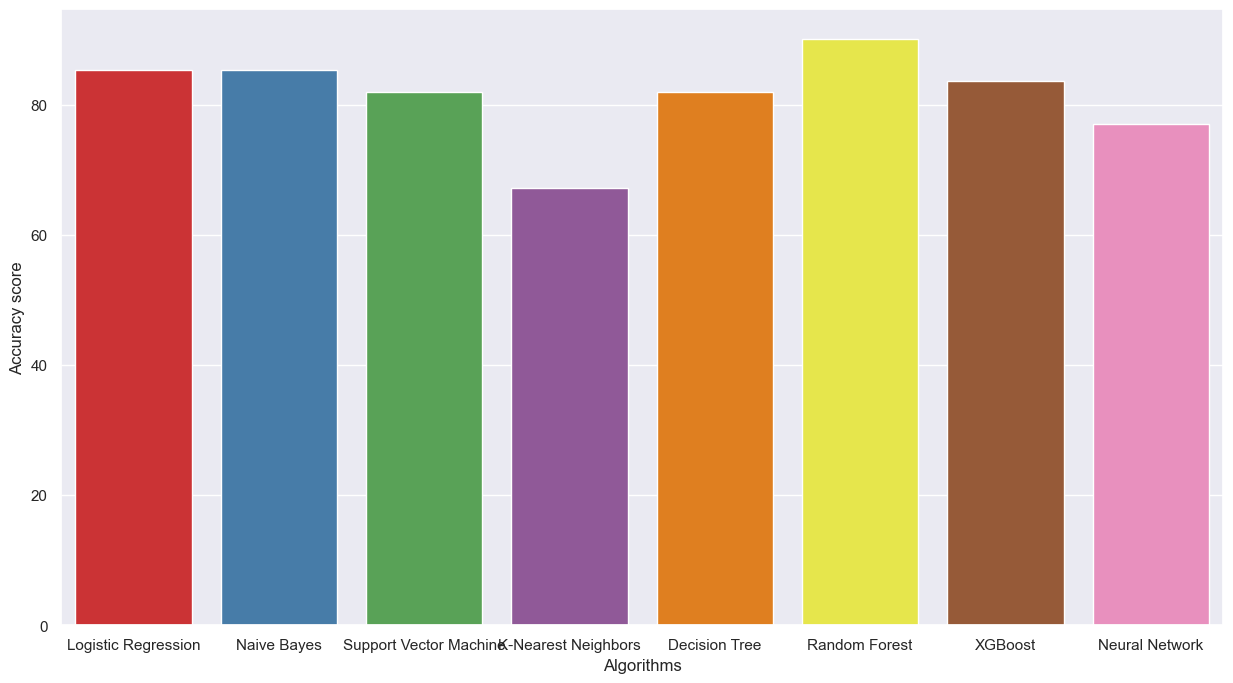

In [70]:
sns.set(rc={'figure.figsize':(15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms, y = scores, palette="Set1")

Here we can see ***Random Forest*** has good result as compare to other algorithms.


***